DigitRecognition_MNIST
implement cnn for digit recognization on the MNIST dataset

In [43]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras import backend as K
import matplotlib.pyplot as plt

create the train data and test data

In [44]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Data Preprocessing

In [45]:
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [46]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Build the model

In [51]:
inpx= Input(shape = input_shape)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(2, 2))(layer2)
layer4 = Dropout(0.25)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(256, activation='sigmoid')(layer5)
layer7 = Dense(10, activation = 'softmax')(layer6)

train the cnn (calling compile and fit function)

In [52]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(x_train, y_train,epochs = 12, batch_size=500)

Epoch 1/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.0980 - loss: 2.4749
Epoch 2/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.0979 - loss: 2.4540
Epoch 3/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.0978 - loss: 2.4368
Epoch 4/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.0979 - loss: 2.4175
Epoch 5/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.0971 - loss: 2.3979
Epoch 6/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.0988 - loss: 2.3751
Epoch 7/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.0966 - loss: 2.3571
Epoch 8/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.0959 - loss: 2.3456
Epoch 9/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.0986 - loss: 2.3233
Epoch 10/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.0993 - loss: 2.3076
Epoch 11/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.1008 - loss: 2.2914
Epoch 12/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 

evaluate model

In [53]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2605581283569336
Test accuracy: 0.12160000205039978


In [54]:
y_predicted_by_model = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


In [55]:
y_predicted_by_model[0]

array([0.09274839, 0.10513683, 0.09914835, 0.07975669, 0.06595758,
       0.09664127, 0.11172913, 0.08551639, 0.13867795, 0.12468734],
      dtype=float32)

In [56]:
np.argmax(y_predicted_by_model[6])

8

In [57]:
np.argmax(y_test[6])

4

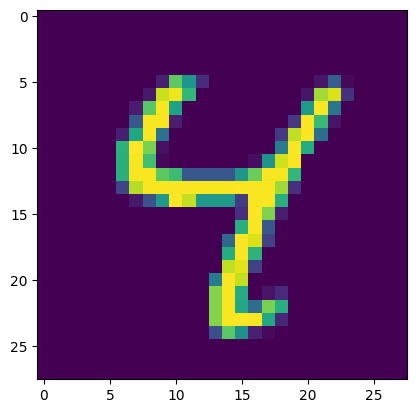

In [58]:
plt.imshow(x_test[6])